In [101]:
import sklearn
sklearn.__version__
#pip install --upgrade scikit-learn

'1.3.2'

In [5]:
#pip install opencv-python

In [1]:
#pip install --upgrade scikit-learn
import os
os.environ["OMP_NUM_THREADS"] = "1"
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

#from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import BisectingKMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import cv2

## Segmentacion de clientes

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
# Convertir la variable cualitativa gender a binaria donde ‘Hombre’ vale 0 y ‘Mujer’ 1
df['Gender'] = pd.get_dummies(df['Gender']).values
df['Gender']

0      0
1      0
2      1
3      1
4      1
      ..
195    1
196    1
197    0
198    0
199    0
Name: Gender, Length: 200, dtype: uint8

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [6]:
#sns.pairplot(df.dropna(), hue='Gender',size=4,vars=["Age","Annual Income (k$)","Spending Score (1-100)"],kind='scatter')

In [3]:
x=np.array(df.iloc[:,3:])
print('x',np.shape(x))
print(x)

x (200, 2)
[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]

## Divisivo

In [126]:
bkmeans=BisectingKMeans(n_clusters=5,n_init=10)
bkmeans.fit(x)
clusters=bkmeans.predict(x)

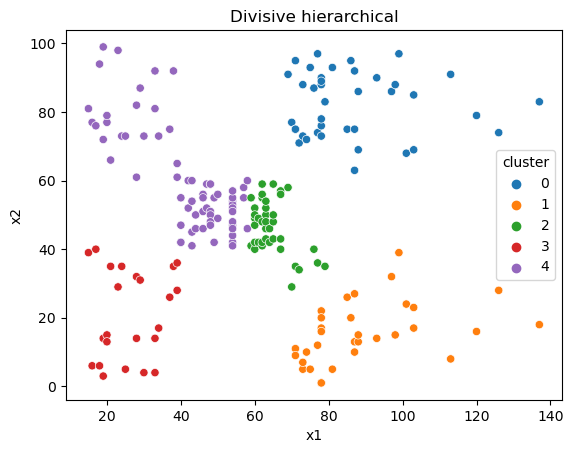

In [127]:

data = {'x1': x[:, 0], 'x2': x[:, 1], 'cluster': clusters}
df = pd.DataFrame(data)

plt.figure()
sns.scatterplot(data=df, x='x1', y='x2', hue='cluster', palette='tab10', legend='full')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(fr'Divisive hierarchical')
plt.show()

## DBSCAN

### Determinar el valor optimo de epsilon

In [50]:
# Calculate the average distance between each point in the data set and its n_neighbors nearest neighbors
neighbors = NearestNeighbors(n_neighbors=1)
neighbors_fit = neighbors.fit(x)
distances, indices = neighbors_fit.kneighbors(x)
distances
#indices

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [26]:
#Sort distance values by ascending value and plot.
distances_ordered = np.sort(distances[:,1])
print(distances_ordered)

[ 0.          0.          0.          0.          0.          0.
  0.          0.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.41421356  1.41421356  1.41421356
  1.41421356  1.41421356  1.41421356  1.41421356  1.41421356  1.41421356
  1.41421356  1.41421356  1.41421356  1.41421356  1.41421356  1.41421356
  1.41421356  1.41421356  1.41421356  1.41421356  1.41421356  1.41421356
  1.41421356  1.41421356  1.41421356  1.41421356  1.41421356  1.41421356
  2.          2.          2.          2.          2.          2.
  2.          2.          2.          2.          

Text(0, 0.5, ' nearest neighbor distance')

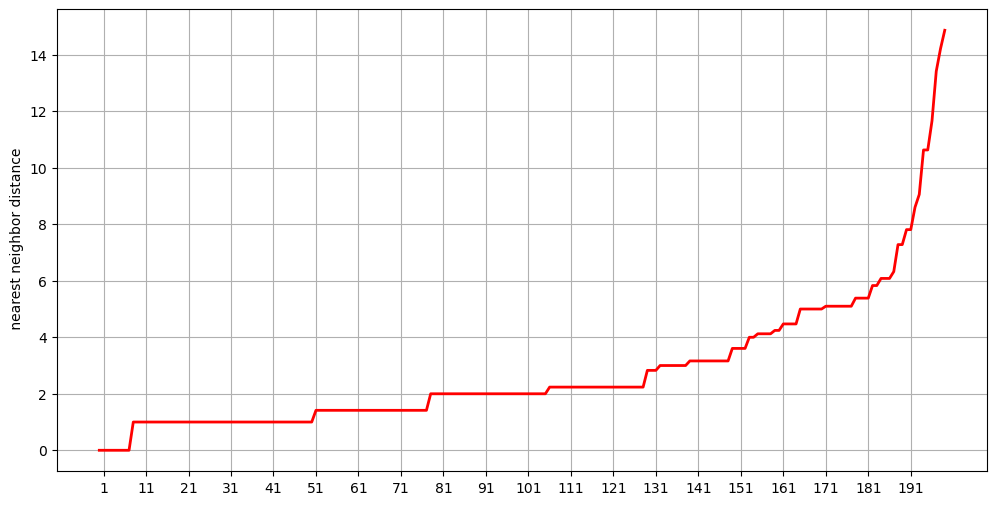

In [35]:
min_distances = distances_ordered[0]
max_distances = distances_ordered[-1]
#avg_distances = np.mean(distances,axis=1)
#print(avg_distances)
#np.shape(distances)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(distances_ordered, linewidth=2, color="red")#,label='nearest neighbor distance')
#plt.plot(min_distances, linewidth=2, color="orange",label='min distance')
#plt.plot(max_distances, linewidth=2, color="green",label='max distance')
plt.xticks(np.arange(1,len(distances_ordered),10))
#plt.yticks(np.arange(1,20,5))
plt.ylabel(' nearest neighbor distance')
#plt.legend()
#plt.savefig (r'C:\HTD\figs\avg_kneighbor.png')

avg_distances [ 4.82400708  3.72335881  3.57622461  2.3843298   4.31037937  2.20478298
  3.05833637  6.13513714  3.43236842  3.66754375  2.72267122  6.21065612
  2.86911783  2.29056942  2.67358086  2.67869416  3.93191989  5.50064654
  4.55956744  5.54703341  3.52069063  2.93896844  4.62366066  3.02069063
  4.94261542  4.68551069  3.06129136  7.82675629  3.53547328  4.67831158
  4.57426464  3.75        5.26556444  5.60078106  4.54056942  4.88030615
  4.83932864  3.91695226  5.32944835  4.52419093  3.94134782  6.84466903
  3.39493466  2.82134582  4.47487373  4.05851903  3.03824844  3.18216423
  1.85122959  1.85122959  2.16751159  2.31532429  2.14015582  2.31155281
  2.04551062  2.58113883  2.16751159  1.85355339  1.41257038  1.76612378
  1.83113883  1.79056942  1.26612378  1.29056942  1.10355339  1.15138782
  1.30901699  1.30901699  1.15138782  1.51612378  1.89412281  3.77475488
  1.82514077  2.15632903  1.25        1.          1.          1.5
  1.          1.75        1.5         1.25  

Text(0.5, 1.0, 'k=4')

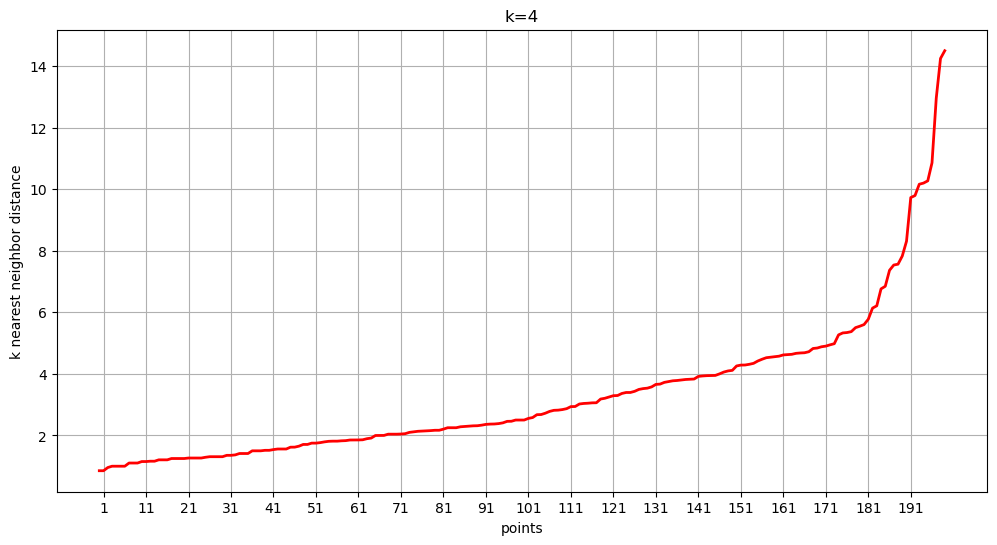

In [70]:
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(x)
distances, indices = neighbors_fit.kneighbors(x)
#print(distances[0])

#Sort distance values by ascending value and plot.
avg_distances = np.mean(distances,axis=1)
print('avg_distances',avg_distances)
distances_ordered = np.sort(avg_distances)

plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(distances_ordered, linewidth=2, color="red")#,label='nearest neighbor distance')
#plt.plot(min_distances, linewidth=2, color="orange",label='min distance')
#plt.plot(max_distances, linewidth=2, color="green",label='max distance')
plt.xticks(np.arange(1,len(distances_ordered),10))
#plt.yticks(np.arange(1,20,5))
plt.ylabel('k nearest neighbor distance')
plt.xlabel('points')
plt.title('k=4')

In [81]:
epsilon=12
minsamp=9
model_db=DBSCAN(eps=epsilon, min_samples=minsamp)
model_db.fit(x)

DBSCAN(eps=12, min_samples=9)

In [82]:
clusters = model_db.labels_
clusters

array([-1,  0,  1,  0, -1,  0,  1, -1,  1,  0,  1, -1,  1,  0,  1,  0,  2,
        0,  2, -1,  2,  0,  1,  0,  1,  0,  2,  2,  2,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  2,  0,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  2,  3,  2,  3,  4,  3,  4,  3,  2,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  4,  3,  4,  3, -1,  3,  4,  3, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

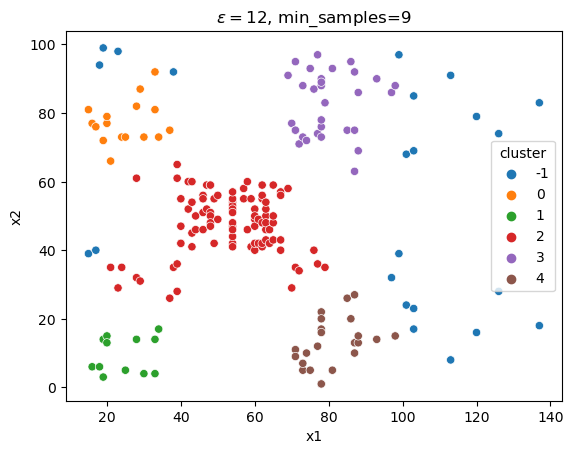

In [83]:

data = {'x1': x[:, 0], 'x2': x[:, 1], 'cluster': clusters}
df = pd.DataFrame(data)

plt.figure()
sns.scatterplot(data=df, x='x1', y='x2', hue='cluster', palette='tab10', legend='full')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(fr'$\epsilon={epsilon}$, min_samples={minsamp}')
plt.show()

In [84]:
silhouette_score(x, clusters, metric='euclidean')

0.4260237574720438

In [91]:
points_epsilon=10
points_sample=9
silscore=np.zeros((points_epsilon,points_sample))
epsilon = np.linspace(5,14,points_epsilon)
samples = np.linspace(2,10,points_sample)
for i in range(0,points_epsilon):
    for j in range(0,points_sample):
        #print('epsilon[i]',epsilon[i])
        #print('samples[j]',samples[j])
        model_db=DBSCAN(eps=epsilon[i], min_samples=int(samples[j]))
        model_db.fit(x)
        silscore[i,j]=silhouette_score(x, model_db.labels_, metric='euclidean')

maxindex=np.unravel_index(silscore.argmax(), silscore.shape)
print('minindex',maxindex)
print('epsilon', epsilon[maxindex[0]], 'min_samples', samples[maxindex[1]])
print(np.max(silscore))  


minindex (4, 1)
epsilon 9.0 min_samples 3.0
0.475053701963407


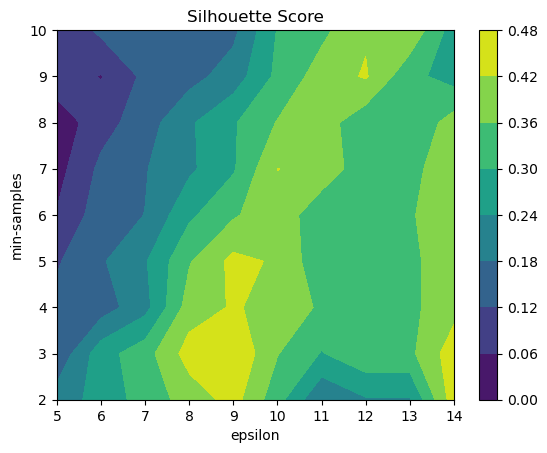

In [80]:
epsilon_mesh, samples_mesh = np.meshgrid(epsilon, samples)
plt.figure()
contour = plt.contourf(epsilon_mesh, samples_mesh, silscore.T, cmap='viridis')
plt.colorbar(contour)
plt.xlabel('epsilon')
plt.ylabel('min-samples')
plt.title('Silhouette Score')
plt.show()

## Gaussian mixtures

In [7]:
pip install --upgrade threadpoolctl

  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
Note: you may need to restart the kernel to use updated packages.


In [26]:
n_components = np.arange(1, 7)
models_gmm = [GaussianMixture(n_components=n, covariance_type='full', random_state=0).fit(x) for n in n_components]
models_gmm

[GaussianMixture(random_state=0),
 GaussianMixture(n_components=2, random_state=0),
 GaussianMixture(n_components=3, random_state=0),
 GaussianMixture(n_components=4, random_state=0),
 GaussianMixture(n_components=5, random_state=0),
 GaussianMixture(n_components=6, random_state=0)]

In [49]:
#num_clusters=5
#gmm = GaussianMixture(n_components=num_clusters,covariance_type='full', random_state=0).fit(x)
gmm=models_gmm[-2]
labels_gmm = gmm.predict(x)
labels_gmm

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int64)

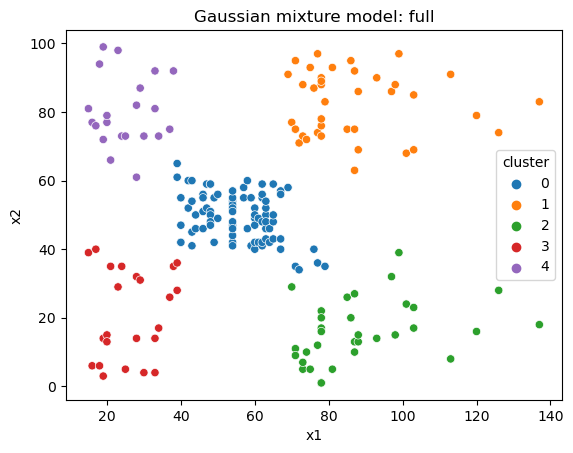

In [50]:
data = {'x1': x[:, 0], 'x2': x[:, 1], 'cluster': labels_gmm}
df = pd.DataFrame(data)

plt.figure()
sns.scatterplot(data=df, x='x1', y='x2', hue='cluster', palette='tab10', legend='full')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(fr'Gaussian mixture model: full')
plt.show()


In [51]:
silhouette_score(x, labels_gmm, metric='euclidean')

0.5528243704895652

## Image segmentation

shape(image1) (524, 700, 3)


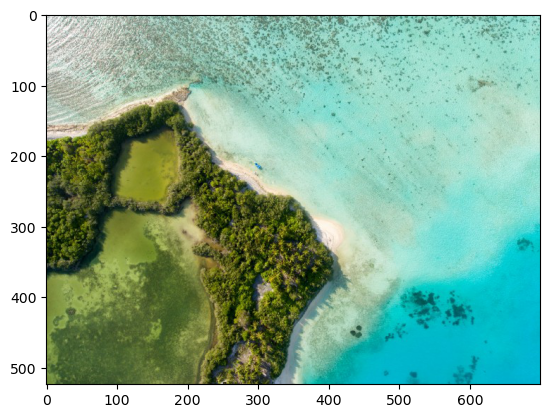

In [2]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
image1 = imread("image1_for_clustering.jpeg")
#print('shape(image1)',np.shape(image1))
plt.imshow(image1)
plt.show()

In [96]:
# import cv2
# image1 = cv2.imread("image1_for_clustering.jpeg")

# plt.imshow(image1)
# plt.show()
# img1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
# plt.imshow(img1)
# plt.show()

In [4]:
#converting the MxNx3 image into a Kx3 matrix with K=MxN=524x700
print('np.shape(image1)',np.shape(image1))
reshaped_image = image1.reshape((-1,3))
#reshaped_image = np.float32(reshaped_img1 )
np.shape(reshaped_image)

np.shape(image1) (524, 700, 3)


(366800, 3)

## DBSCAN

labels [0 0 0 ... 0 0 0]
labels_reshaped [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


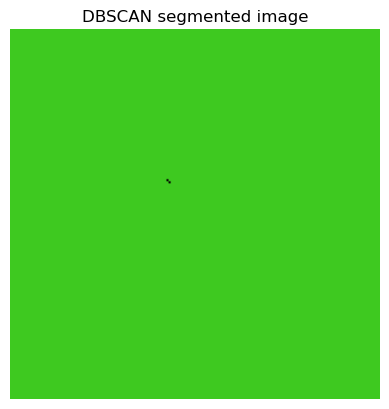

In [40]:
import cv2
resized_image = cv2.resize(image1, (175, 175))  # Resizing the image to be able to use dbscan
# Reshape the image into a 2D array of pixel values
reshaped_resized_image= resized_image.reshape((-1, 3))  #(175x175,3)

# Initialize and fit DBSCAN
dbscan = DBSCAN(eps=40, min_samples=4)  
labels = dbscan.fit_predict(reshaped_resized_image)
print('labels',labels)

# Reshaping the labels to the original image shape 
labels_reshaped = labels.reshape(resized_image.shape[0], resized_image.shape[1])
print('labels_reshaped',labels_reshaped)

unique_labels = np.unique(labels)
segmented_image = np.zeros_like(resized_image) # to create an array of zeros with the same shape and data type as resized_image
#print(segmented_image)
# Visualize the clustering results by assigning colors based on cluster labels
for label in unique_labels:
    if label == -1:  # noise points 
        # Assign black to noise points
        color = [0, 0, 0]  
    else:
        # Assign random color to each cluster
        color = np.random.randint(0, 255, size=3)  

    segmented_image[labels_reshaped == label] = color


plt.imshow(segmented_image) 
#plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('DBSCAN segmented image')
plt.show()

In [28]:
unique_labels, label_counts=np.unique(labels, return_counts=True)
unique_labels

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107], dtype=int64)

In [29]:
unique_labels=np.unique(labels)
unique_labels

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107], dtype=int64)

## Kmeans

labels [8 4 4 ... 6 6 6]
centers [[150.25275913 219.92268254 203.76991105]
 [ 76.00212522  91.10876013  38.38524954]
 [  6.00253618 150.771744   151.86931225]
 [109.26037474 154.60536664 139.04418228]
 [198.68063577 221.68410566 202.82937094]
 [ 30.69916228  43.98675855  15.68217133]
 [  4.67385593 188.58207016 201.49403782]
 [114.46983933 124.72009181  50.40146901]
 [154.64083191 189.29132849 167.9773868 ]
 [148.44210148 156.46662562  76.1843928 ]]
centers[labels] [[154.64083191 189.29132849 167.9773868 ]
 [198.68063577 221.68410566 202.82937094]
 [198.68063577 221.68410566 202.82937094]
 ...
 [  4.67385593 188.58207016 201.49403782]
 [  4.67385593 188.58207016 201.49403782]
 [  4.67385593 188.58207016 201.49403782]]
shape(centers) (366800, 3)
np.shape(segmented_image) (524, 700, 3)


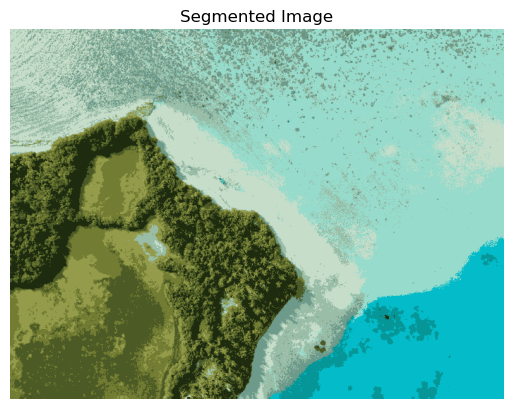

In [36]:
k = 10

kmeans = KMeans(n_clusters=k, n_init='auto')
kmeans.fit(reshaped_image)


labels = kmeans.labels_
print('labels',labels)
centers = kmeans.cluster_centers_
print('centers',centers)

#centers[labels] fetches the center values corresponding to each pixel's assigned cluster label.
print('centers[labels]',centers[labels])
print('shape(centers)',np.shape(centers[labels]))

# Assigning each pixel to its respective cluster center
segmented_image = centers[labels].reshape(image1.shape).astype(np.uint8) 
#.astype(np.uint8) converts the data type of the resulting array to np.uint8 to ensure compatibility with image representations 
print('np.shape(segmented_image)',np.shape(segmented_image))


plt.imshow(segmented_image)  
plt.axis('off')  
plt.title('Segmented Image')
plt.show()

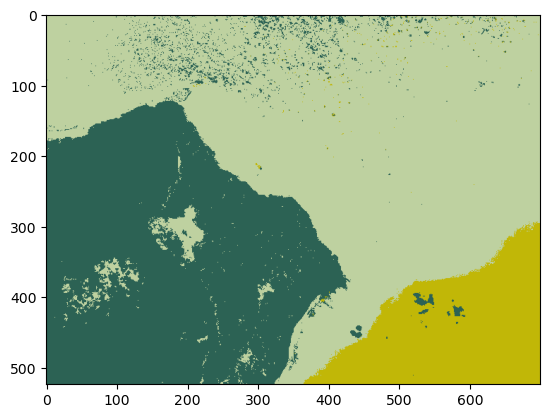

In [17]:
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for Matplotlib